# Business Understanding

The company is expanding into both privatized and commercial aviation to diversify its portfolio. They would like to understand which aircraft types have the lowest risk. 
The "AviationData.csv" dataset provided by the NTSB, that will be explored in this notebook, contains information on selected accidents from 1962 to 2023. These are incidents that have taken place within the United States, its territories and possessions, and in international waters.

**Key/focus questions:**
- Which aircraft types have the lowest accident severity?
- Is a private or commercial flight riskier?
- Are certain conditions (e.g., weather, location) more associated with severe accidents?

**Audience**: Aviation division team and the company's stakeholders eg managers 


In [1]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase1/Phase-1-Aviation-Project/data/AviationData.csv", index_col = 0, encoding='cp1252')

C:\Users\PC\AppData\Local\Temp\ipykernel_15104\4218076357.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase1/Phase-1-Aviation-Project/data/AviationData.csv", index_col = 0, encoding='cp1252')


# Understanding the Dataset

In [3]:
#looking into the datasets shape 
df.shape

(88889, 30)

In [4]:
#information on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [5]:
#data types of the columns 
df.dtypes

Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Da

In [6]:
#looking into the first 5 rows of the dataset to get an idea of the data
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Cleaning the dataset 

Using the head function and looking at the different columns of the dataset, some columns are not required moving forward. 

**Why?** This is because they are not part/helpful in the analysis and will not interfere when forming a data driven conclusion. The columns such as Event Id and Accident number are just for administration purposes and Report status and publication date would be desired for a different type of analysis

In [8]:
#Getting the column names in the dataset

df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
#forming a list of the unrequired columns

unwanted_columns = ['Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Registration.Number', 'Accident.Number', 'Report.Status',
       'Publication.Date']
df = df.drop(columns = unwanted_columns)

In [10]:
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,...,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach


In [11]:
# checking for columns with missing values 
missing_count = df.isna().sum()
missing_count

Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [12]:
#checking for the percentages of columns with missing values 
#if it is greater than 50%, the columns are to be dropped

row_number = len(df)

missing_percentage = (missing_count / row_number) * 100
missing_percentage.sort_values(ascending = True)

Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058500
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Weather.Condition          5.053494
Total.Uninjured            6.650992
Number.of.Engines          6.844491
Purpose.of.flight          6.965991
Engine.Type                7.982990
Total.Fatal.Injuries      12.826109
Total.Minor.Injuries      13.424608
Total.Serious.Injuries    14.073732
Broad.phase.of.flight     30.560587
Aircraft.Category         63.677170
FAR.Description           63.974170
Air.carrier               81.271023
Schedule                  85.845268
dtype: float64

In [13]:
#dropping the columns with high percentage of missing values

df = df.drop(columns = ['Schedule', 'Air.carrier', 'FAR.Description'])
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
Event.Id,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [14]:
df.shape

(88889, 19)

In [15]:
#Checking for duplicates in the data 

df.duplicated().value_counts()

False    88854
True        35
Name: count, dtype: int64

In [16]:
#dropping the duplicates 

df = df.drop_duplicates()
df.shape

(88854, 19)

In [17]:
#rechecking duplicates 
df.duplicated().value_counts()

False    88854
Name: count, dtype: int64

### Handling Missing Values 

Working according to the data types i.e, categorical or numerical, and the outliers.

In [18]:
df.dtypes 

Investigation.Type         object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
dtype: object

In [19]:
df.isna().sum().sort_values(ascending = True)

Investigation.Type            0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity             998
Aircraft.damage            3191
Weather.Condition          4490
Total.Uninjured            5908
Number.of.Engines          6080
Purpose.of.flight          6189
Engine.Type                7093
Total.Fatal.Injuries      11398
Total.Minor.Injuries      11926
Total.Serious.Injuries    12503
Broad.phase.of.flight     27158
Aircraft.Category         56577
dtype: int64

## Numerical columns 

- First step will be describing the numerical columns and see if their mean and any outliers
- Fill the missing values using an appropriate and logical manner

After handling the missing data:
- Plotting graphs to visualise these outliers
- Handling the outliers if present
- Plot a graph to indicate the difference

In [20]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [21]:
#creating a list of the columns which are float as indicated above 
float_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
float_columns

['Number.of.Engines',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured']

- Due to an error faced later as your filling in the missing values, converting to numeric is required since the columns are float
- This means using the pd.to_numeric function 

In [22]:
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
for col in float_columns:
    print(df[col].dtype)

float64
float64
float64
float64
float64


In [24]:
#use a for loop to describe each of the columns in the above list to see their properties 

for col in float_columns:
    print(f"{col} description:") 
    print(df[col].describe())
    print("\n") #having line between each descruption 

Number.of.Engines description:
count    82774.000000
mean         1.146556
std          0.446518
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64


Total.Fatal.Injuries description:
count    77456.000000
mean         0.647826
std          5.487038
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64


Total.Serious.Injuries description:
count    76351.000000
mean         0.279892
std          1.544285
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        161.000000
Name: Total.Serious.Injuries, dtype: float64


Total.Minor.Injuries description:
count    76928.000000
mean         0.357061
std          2.235891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        380.000000
Name: Total.Minor.Injuries,

In [25]:
#calculating the median of the float columns 

for col in float_columns:
    print(f"Median for {col}:")
    print(df[col].median())
    print("\n")

Median for Number.of.Engines:
1.0


Median for Total.Fatal.Injuries:
0.0


Median for Total.Serious.Injuries:
0.0


Median for Total.Minor.Injuries:
0.0


Median for Total.Uninjured:
1.0




From the results above:
- The number of engines is mostly 1. This is the suitable number to use to fill in the missing values in the rows for the Number of engine column. The outliers being 8 for example are for aircrafts which are used in the military. In this case, we are analysing for commercial or private aircrafts hence not considered. 
- For injury based columns (the other 4 float columns), missing values means that the injuries were not collected/noted down. Therefore cannot fill in the missing values using the median/mean as it will not be accurate/correct assumption. 

In [26]:
#filling in the missing values 

#filling in the no.of.engines column
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

In [27]:
# other 4 columns that are to be filled with 0 
four_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in four_columns:
    df[col] = df[col].fillna(0)

In [28]:
#checking if they have been filled 
df[float_columns].isnull().sum()

Number.of.Engines         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

- Able to handle the missing values in the numerical columns and now proceed to handle the outliers based on the results from the describe function

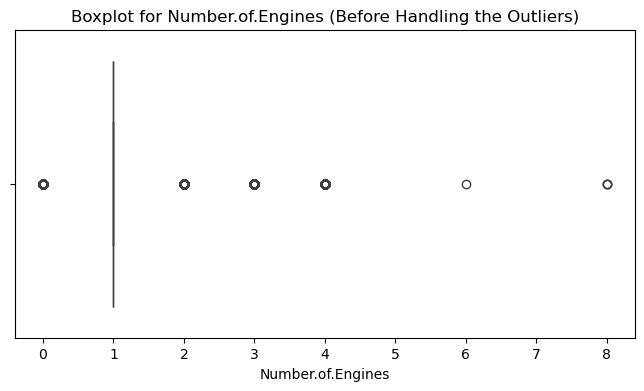

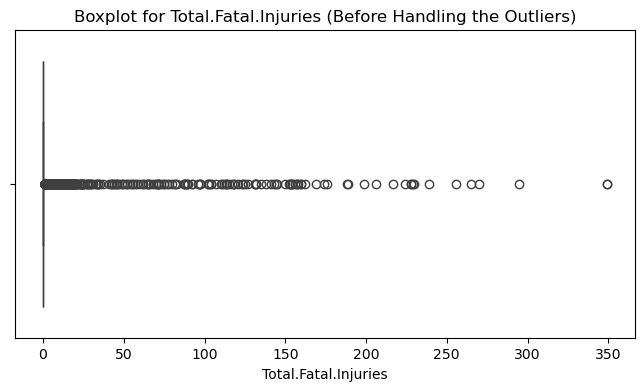

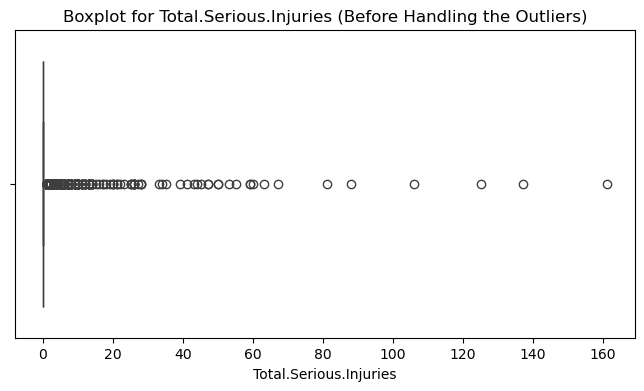

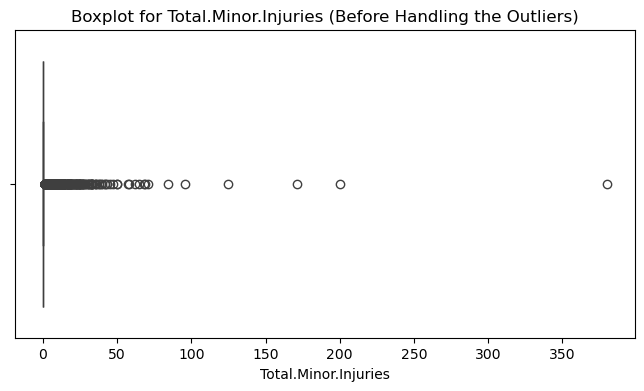

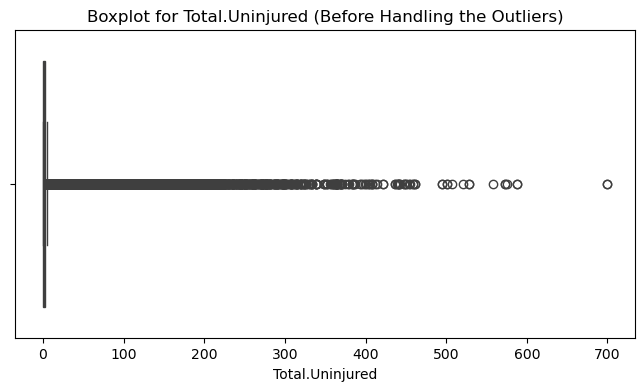

In [29]:
# create a boxplot to visualise the outliers in each of the float columns in the list formed 
for col in float_columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot for {col} (Before Handling the Outliers)')
    plt.show()

- We can now visually notice that there are outliers present in the numerical columns that need to be dealt with

In [30]:
# removing the outliers in the float columns 

for col in float_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

# for correcting the dataframe without outliers present     
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [31]:
df.shape

(37805, 19)

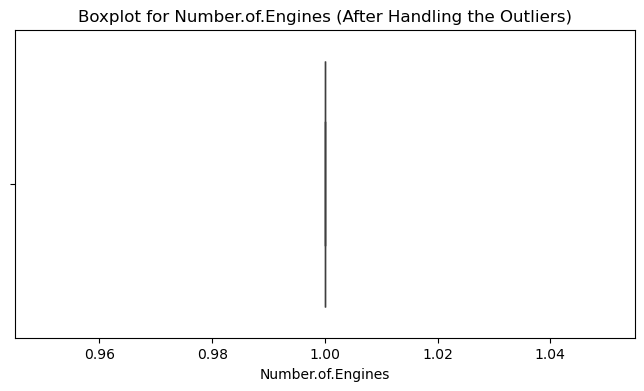

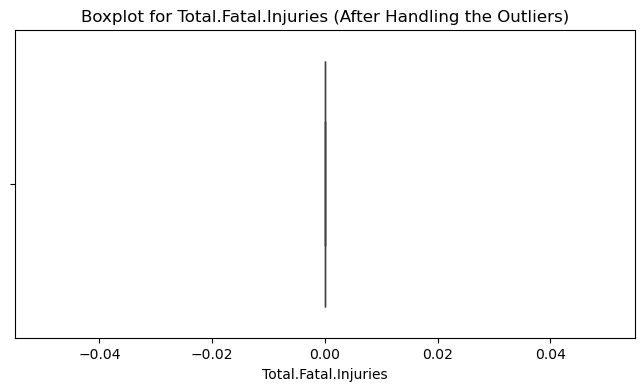

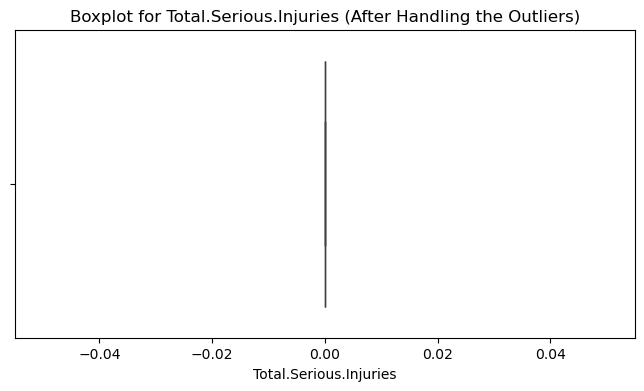

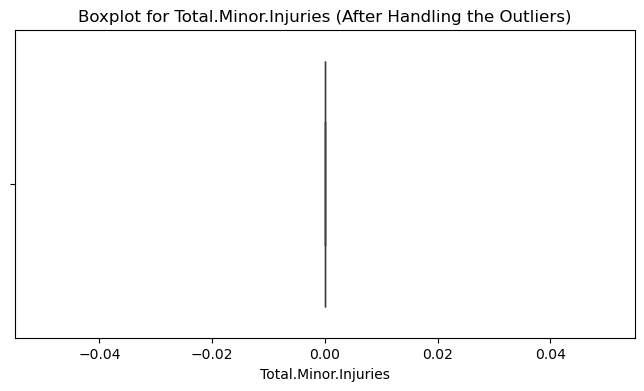

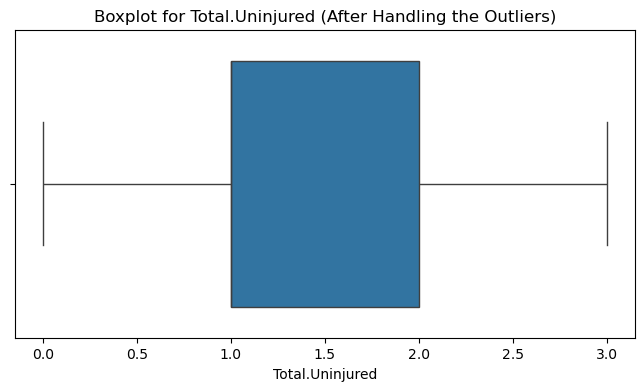

In [32]:
# plotting after handling the colums outliers

for col in float_columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot for {col} (After Handling the Outliers)')
    plt.show()

In [33]:
# lastly can deescribe and see if the outliers are still present 

for col in float_columns:
    print(f"{col} description:") 
    print(df[col].describe())
    print("\n") #having line between each descruption 

Number.of.Engines description:
count    37805.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Number.of.Engines, dtype: float64


Total.Fatal.Injuries description:
count    37805.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Total.Fatal.Injuries, dtype: float64


Total.Serious.Injuries description:
count    37805.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Total.Serious.Injuries, dtype: float64


Total.Minor.Injuries description:
count    37805.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Total.Minor.Injuries, dtype: float64


Total.Uninjured description:
count    37805.000000
mean         1.480122
std          0.677462
min          0.000000
25%          1.000000
50%

### Categorical data

In [34]:
# checking the columns again 

df.isna().sum().sort_values(ascending = True)

Investigation.Type            0
Event.Date                    0
Total.Uninjured               0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Total.Fatal.Injuries          0
Number.of.Engines             0
Location                     16
Make                         31
Model                        39
Country                      50
Amateur.Built                54
Aircraft.damage             703
Injury.Severity             765
Weather.Condition          1515
Purpose.of.flight          1552
Engine.Type                2188
Broad.phase.of.flight     11372
Aircraft.Category         23196
dtype: int64

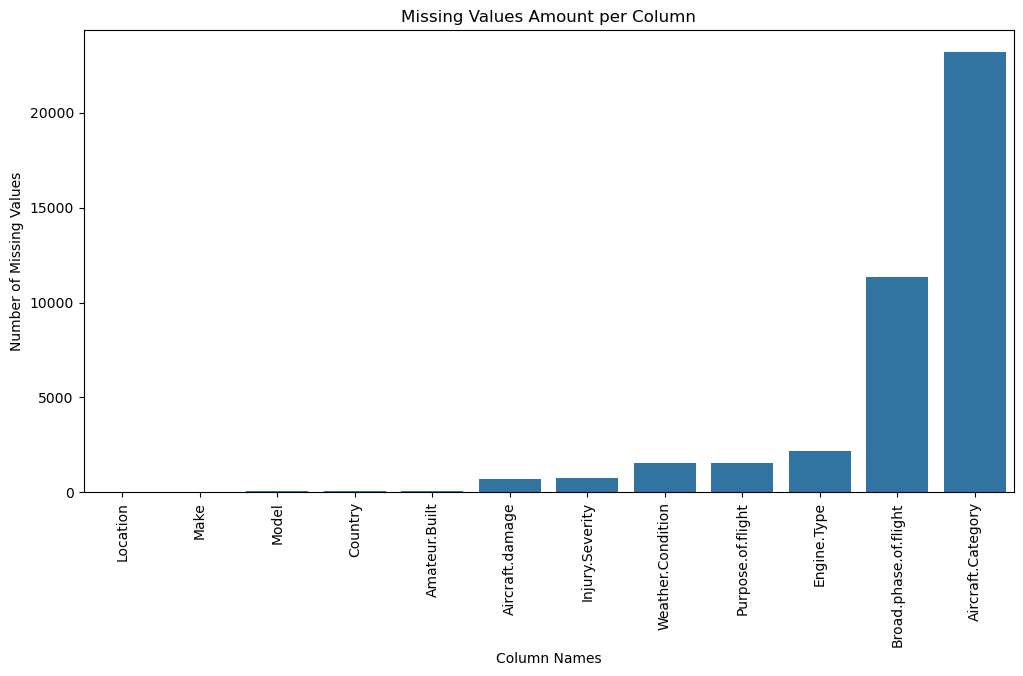

In [35]:
# we can create a graph to visualise this 

missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending = True)

# Plot
plt.figure(figsize = (12,6))
sns.barplot(x = missing_counts.index, y = missing_counts.values)
plt.title('Missing Values Amount per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Names')
plt.xticks(rotation = 90)
plt.show()

From the results above:
- The numerical columns with missing values have been handled and the categorical columns are yet to be handled
- The aircraft category column has a very high value of missing data, there needs to be dropped as it will not be helpful 

In [36]:
# we first drop the aircraft category column 
df = df.drop(columns=['Aircraft.Category'])
df.head(2)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
Event.Id,,,,,,,,,,,,,,,,,,
20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff
20020909X01559,Accident,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach


In [38]:
# after dropping the column, proceed to create a list of the columns that are object and get their unique values and understand

object_columns = list(df.select_dtypes(include='object'))
object_columns

['Investigation.Type',
 'Event.Date',
 'Location',
 'Country',
 'Injury.Severity',
 'Aircraft.damage',
 'Make',
 'Model',
 'Amateur.Built',
 'Engine.Type',
 'Purpose.of.flight',
 'Weather.Condition',
 'Broad.phase.of.flight']

In [40]:
# from the list above get the columns which are missing values 

missing_columns = []

for col in object_columns:
    if df[col].isna().any():
        missing_columns.append(col)

missing_columns

['Location',
 'Country',
 'Injury.Severity',
 'Aircraft.damage',
 'Make',
 'Model',
 'Amateur.Built',
 'Engine.Type',
 'Purpose.of.flight',
 'Weather.Condition',
 'Broad.phase.of.flight']

In [41]:
#now getting their unique values in the list above 

for col in missing_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")

Unique values in Location:
['PULLMAN, WA' 'HOBBS, NM' 'TUSKEGEE, AL' ... 'Kildare, '
 'Rancho Cordova, CA' 'San Manual, AZ']


Unique values in Country:
['United States' 'GULF OF MEXICO' 'Puerto Rico' nan 'Bahamas'
 'Netherlands Antilles' 'CARIBBEAN SEA' 'Philippines' 'Mexico'
 'ATLANTIC OCEAN' 'Northern Mariana Islands' 'Turks And Caicos Islands'
 'Japan' 'Panama' 'PACIFIC OCEAN' 'American Samoa' 'Germany' 'Sudan'
 'United Kingdom' 'Venezuela' 'Canada' 'Switzerland' 'Argentina'
 'West Indies' 'Brazil' 'Trinidad And Tobago' 'Colombia' 'Fiji'
 'Netherlands' 'Ireland' 'Peru' 'Central African Republic'
 'British Virgin Islands' 'China' 'Saudi Arabia' 'Mauritius' 'Thailand'
 'Belgium' 'Uruguay' 'Guatemala' 'France' 'Taiwan' 'Iceland' 'Kazakhstan'
 'Ethiopia' 'Australia' 'Egypt' 'India' 'Spain' 'Greece'
 'Korea, Republic Of' 'Ecuador' 'Mozambique' 'Italy' 'Singapore'
 'Indonesia' 'Portugal' 'Finland' 'Guyana' 'Turkey' 'New Zealand'
 'Zimbabwe' 'Costa Rica' 'Federated States Of Micronesia' '

In [44]:
#getting the mode of the unique values in the missing columns data

for col in missing_columns:
    print(f"Mode for {col}: {df[col].mode()[0]}")
    print("\n")

Mode for Location: ANCHORAGE, AK


Mode for Country: United States


Mode for Injury.Severity: Non-Fatal


Mode for Aircraft.damage: Substantial


Mode for Make: Cessna


Mode for Model: 152


Mode for Amateur.Built: No


Mode for Engine.Type: Reciprocating


Mode for Purpose.of.flight: Personal


Mode for Weather.Condition: VMC


Mode for Broad.phase.of.flight: Landing




From the results above:
- We notice that the amateur built column has 2 options which is boolean (yes or no) therefore replace missing values with the mode
- The other columns have multiple options, hence will not be suitable to replace with the mode but rather "missing" 

In [45]:
#handling the missing data for the missing columns 

for col in missing_columns:
    if col == 'Amateur.Built':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna('Missing')

In [46]:
df.isna().any()

Investigation.Type        False
Event.Date                False
Location                  False
Country                   False
Injury.Severity           False
Aircraft.damage           False
Make                      False
Model                     False
Amateur.Built             False
Number.of.Engines         False
Engine.Type               False
Purpose.of.flight         False
Total.Fatal.Injuries      False
Total.Serious.Injuries    False
Total.Minor.Injuries      False
Total.Uninjured           False
Weather.Condition         False
Broad.phase.of.flight     False
dtype: bool

In [68]:
# ensuring the columns which are object are the same with the all the letters uppercase
#avoiding Boeing and BOEING
# Loop through all object columns and clean
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.upper()

In [69]:
#converting the dataset that's been cleaned to csv to use for tableau

df.to_csv('cleaned_aviation_data.csv', index=False)

# Data Analysis

- In this section the dataset will be narrowed down to the top 10 for filtering purposes
- This is to guide into drawing a well informed conclusion on which airplanes and approach is best for the company
- There will be use of diagrams such as bar graphs to form a visual conclusion
- Functions such as groupby will be used to combine/filter the dataset 

In [70]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Year'],
      dtype='object')

In [71]:
df.head(2)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year
Event.Id,,,,,,,,,,,,,,,,,,,
20020909X01562,ACCIDENT,1982-01-01,"PULLMAN, WA",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,140,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,2.0,VMC,TAKEOFF,1982
20020909X01559,ACCIDENT,1982-01-01,"HOBBS, NM",UNITED STATES,NON-FATAL,SUBSTANTIAL,PIPER,PA-28-161,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,APPROACH,1982


In [81]:
# number of makes of aircrafts 
number_of_makes = df['Make'].nunique()
print(f"Number of unique aircraft makes: {number_of_makes}")

Number of unique aircraft makes: 3311


In [82]:
# number of models of aircrafts
number_of_models = df['Model'].nunique()
print(f"Number of unique aircraft models: {number_of_models}")

Number of unique aircraft models: 5365


#### Frequency of accident over the years 
- This will show and help us understand the trend from 1962-2023

In [83]:
# the column Event Date needs to be converted to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
# need to create a column with just the year on its own which would be 1962 for example without month and date
df['Year'] = df['Event.Date'].dt.year

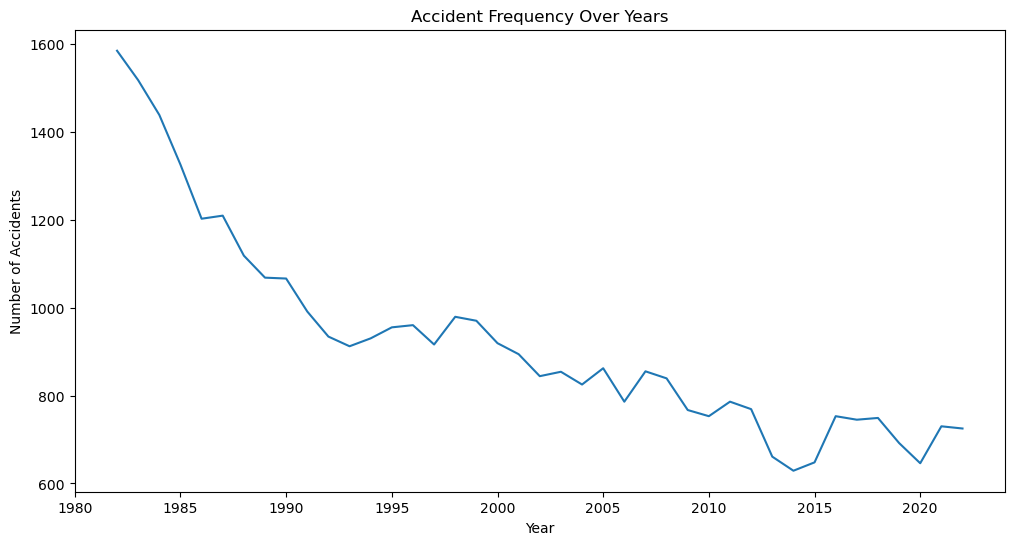

In [84]:
# for the plot, it needs to be grouped by year
accidents_per_year = df.groupby('Year').size()

plt.figure(figsize = (12,6))
sns.lineplot(x = accidents_per_year.index, y = accidents_per_year.values)
plt.title('Accident Frequency Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

From the line graph above you are able to notice that over the years, the number of accidents have decreased. This is possibly due to the imporvements in technology, communication systems and safety protocls over the years. For the company, it would be an indication that investing in aviation is not a bad idea.

#### Top 10 Makes of aircrafts involved in accidents 
- This will help understand which makes to avoid 

In [87]:
top_makes = df['Make'].value_counts().head(10)
top_makes 

Make
CESSNA      13858
PIPER        6406
BEECH        1422
BELL         1030
BOEING        779
GRUMMAN       692
ROBINSON      581
MOONEY        548
BELLANCA      531
HUGHES        441
Name: count, dtype: int64

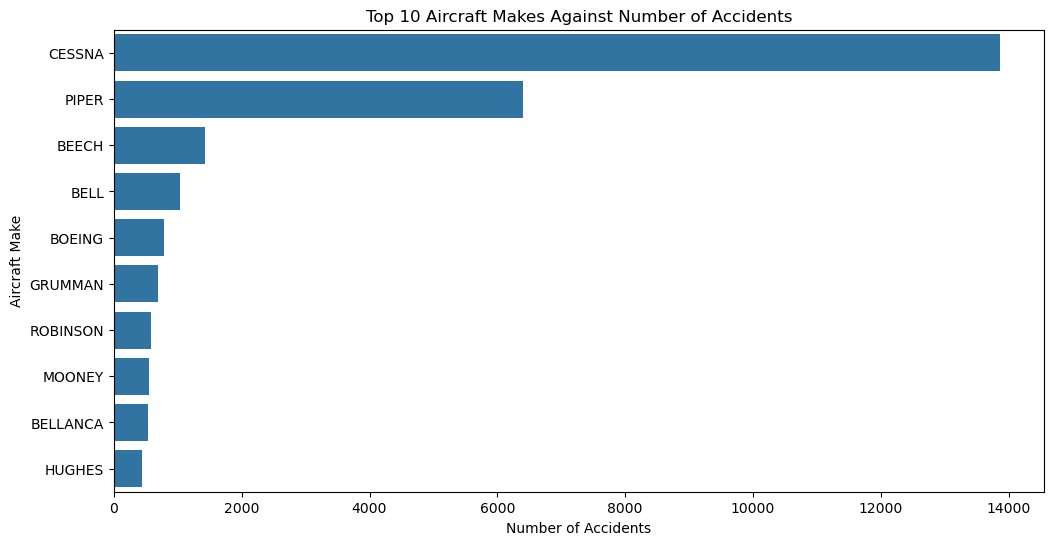

In [92]:
#plotting the graph for visualising 

plt.figure(figsize = (12,6))
sns.barplot(x = top_makes.values, y = top_makes.index)
plt.title('Top 10 Aircraft Makes Against Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.show()

From the horizontal graph above, it would make most sense to espeially avoid Cessna with the highest followed by Piper. These makes makes (the top 2 mentioned) have averagely had the largest number of accidents which would not be a good investment for the company. It would put them and clientel at risk.

#### Top 10 Models against the number of accident 
- Helps us understand the models to avoid 

In [89]:
top_models = df['Model'].value_counts().head(10)
top_models

Model
152          1669
172          1051
172N          635
150           508
180           448
172M          410
PA-18         403
172P          396
PA-18-150     391
PA-28-140     383
Name: count, dtype: int64

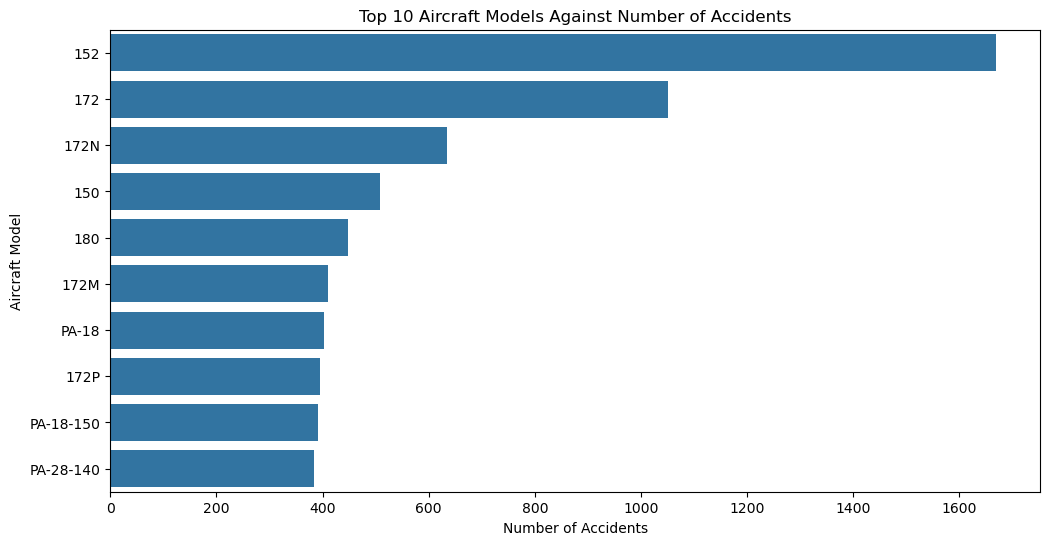

In [91]:
#plotting the graph for visualising 

plt.figure(figsize = (12,6))
sns.barplot(x = top_models.values, y = top_models.index)
plt.title('Top 10 Aircraft Models Against Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.show()

The 152, 172 and 172N models would be be the riskiest and worst options to invest in as a company. This is because they hold the highest number of accidents. The last 5 models hold averagely the same amount of accidents; 172M - PA-28-140.

#### Top 10 Total Uninjured by Aircraft Make 
- This is grouping under the make and will indicate the the safest make to invest in/ make that holds a high capacity of passengers

In [93]:
top_uninjured_make = df.groupby('Make')['Total.Uninjured'].sum().sort_values(ascending=False).head(10)
top_uninjured_make

Make
CESSNA      21023.0
PIPER       10170.0
BEECH        2403.0
BELL         1606.0
ROBINSON      961.0
MOONEY        911.0
BELLANCA      791.0
GRUMMAN       766.0
HUGHES        740.0
MAULE         663.0
Name: Total.Uninjured, dtype: float64

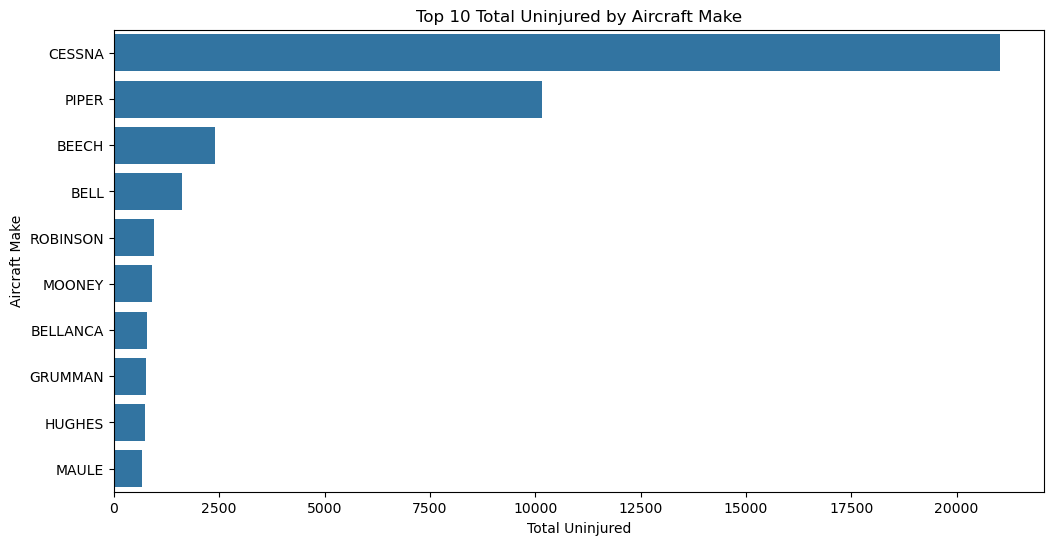

In [101]:
#graph to visualise 

plt.figure(figsize = (12,6))
sns.barplot(x = top_uninjured_make.values, y = top_uninjured_make.index)
plt.title('Top 10 Total Uninjured by Aircraft Make')
plt.xlabel('Total Uninjured')
plt.ylabel('Aircraft Make')
plt.show()

#### Broad Phase of Flight against Total Uninjured
- This is will help draw a conclusion on what the company should focus on (aviation team). This is whether when landing, cruising, etc 

In [95]:
uninjured_by_phase = df.groupby('Broad.phase.of.flight')['Total.Uninjured'].sum().sort_values(ascending=False).head(10)
uninjured_by_phase

Broad.phase.of.flight
MISSING        15818.0
LANDING        15362.0
TAKEOFF         8016.0
CRUISE          5402.0
MANEUVERING     3305.0
APPROACH        3230.0
TAXI            1668.0
DESCENT          901.0
GO-AROUND        819.0
CLIMB            795.0
Name: Total.Uninjured, dtype: float64

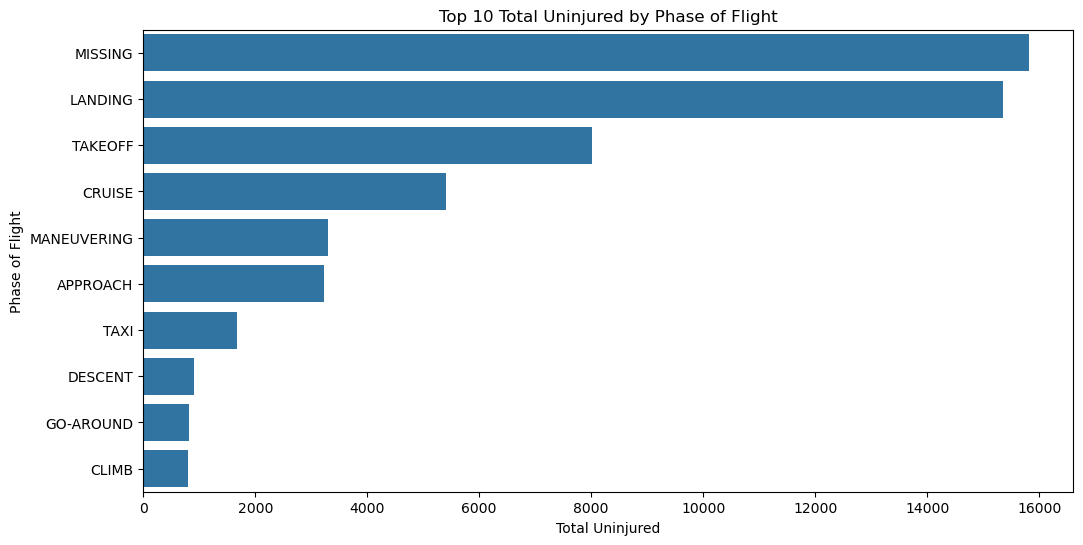

In [102]:
#graph for visualising 

plt.figure(figsize = (12,6))
sns.barplot(x = uninjured_by_phase.values, y = uninjured_by_phase.index)
plt.title('Top 10 Total Uninjured by Phase of Flight')
plt.xlabel('Total Uninjured')
plt.ylabel('Phase of Flight')
plt.show()

According to research, there are multiple phases of flight that can be present in aviation. These include the landing, takeoff, cruise and etc. In the case of the results above, we can assume that the results for "MISSING" is Standing phase of flight because it would mean that it is stationary (the aircraft), hence would have the least uninjured individuals out of all the other phases. Out of the 10 featured, the riskiest phases are descent, go around and climb. Visualising and recognising this can help the company pilots be aware.

#### Weather Condition Impact on Total Uninjured
- This is to indicate which is the safest weather condition, or rather which weather condition holds the least risk

In [97]:
uninjured_by_weather = df.groupby('Weather.Condition')['Total.Uninjured'].sum().sort_values(ascending=False).head(10)
uninjured_by_weather

Weather.Condition
VMC        53784.0
MISSING     1076.0
IMC          860.0
UNK          236.0
Name: Total.Uninjured, dtype: float64

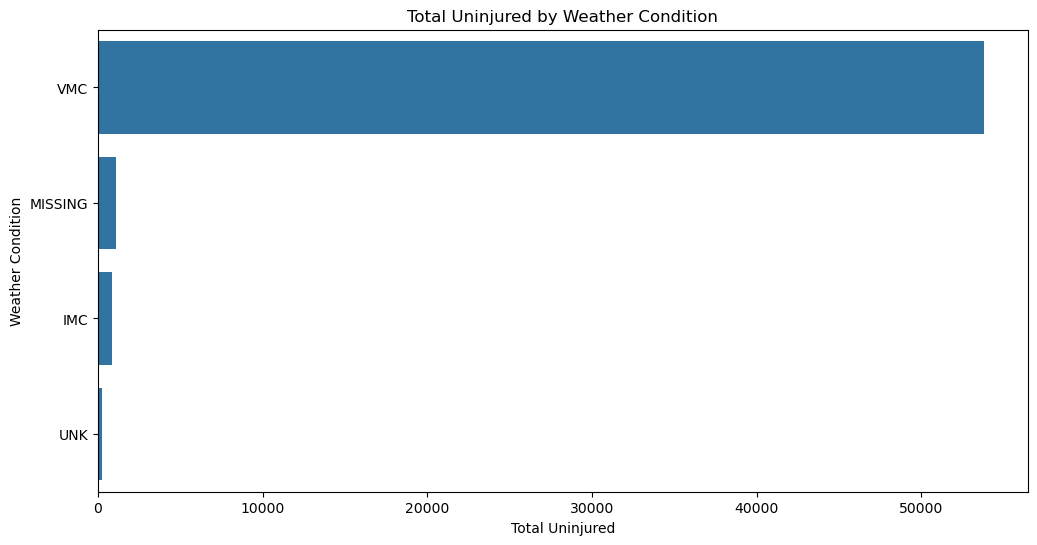

In [98]:
#plotting for visuals 
plt.figure(figsize = (12,6))
sns.barplot(x = uninjured_by_weather.values, y = uninjured_by_weather.index)
plt.title('Total Uninjured by Weather Condition')
plt.xlabel('Total Uninjured')
plt.ylabel('Weather Condition')
plt.show()

The safest weather to travel in based on the results above is VMC which means there is clear weather and good visibility for the pilots. This means that the company would take note of when it is best to have flights taking place and when to avoid flying which would be UNK, meaning unknown i.e, weather is not recorded and unknown.

#### Engine Type 
- Understanding the engines involved in accidents 

In [99]:
engine_type_counts = df['Engine.Type'].value_counts()
engine_type_counts

Engine.Type
RECIPROCATING      33124
MISSING             2188
TURBO SHAFT         1181
TURBO PROP           766
UNKNOWN              454
TURBO FAN             57
TURBO JET             31
ELECTRIC               3
GEARED TURBOFAN        1
Name: count, dtype: int64

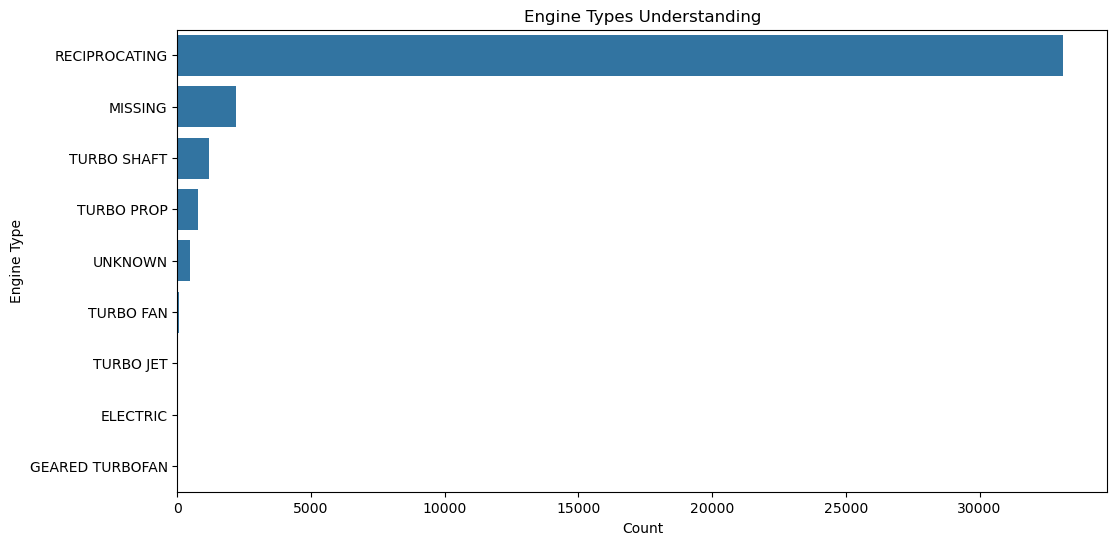

In [100]:
#visuals 
plt.figure(figsize = (12,6))
sns.barplot(x = engine_type_counts.values, y = engine_type_counts.index)
plt.title('Engine Types Understanding')
plt.xlabel('Count')
plt.ylabel('Engine Type')
plt.show()

The results indicate that Reciprocating engine type is one to be avoided as it has the highest count in the number of accidents it is involved in. The safest options for the company to invest is; turbo fan, turbo jet, electric and geared turbofan

#### Flight purpose
- This will help draw a conclusion on the best purpose to invest in as a company venturing into the aviation sector. 

In [103]:
purpose_counts = df['Purpose.of.flight'].value_counts()
purpose_counts

Purpose.of.flight
PERSONAL                     21781
INSTRUCTIONAL                 6752
AERIAL APPLICATION            2860
MISSING                       1552
UNKNOWN                       1318
BUSINESS                      1299
POSITIONING                    519
OTHER WORK USE                 443
FERRY                          302
AERIAL OBSERVATION             256
PUBLIC AIRCRAFT                224
FLIGHT TEST                    153
EXTERNAL LOAD                   49
BANNER TOW                      47
SKYDIVING                       45
EXECUTIVE/CORPORATE             38
PUBLIC AIRCRAFT - FEDERAL       38
PUBLIC AIRCRAFT - LOCAL         31
PUBLIC AIRCRAFT - STATE         30
AIR RACE SHOW                   27
GLIDER TOW                      18
AIR RACE/SHOW                    9
AIR DROP                         5
FIREFIGHTING                     5
PUBS                             2
ASHO                             1
PUBL                             1
Name: count, dtype: int64

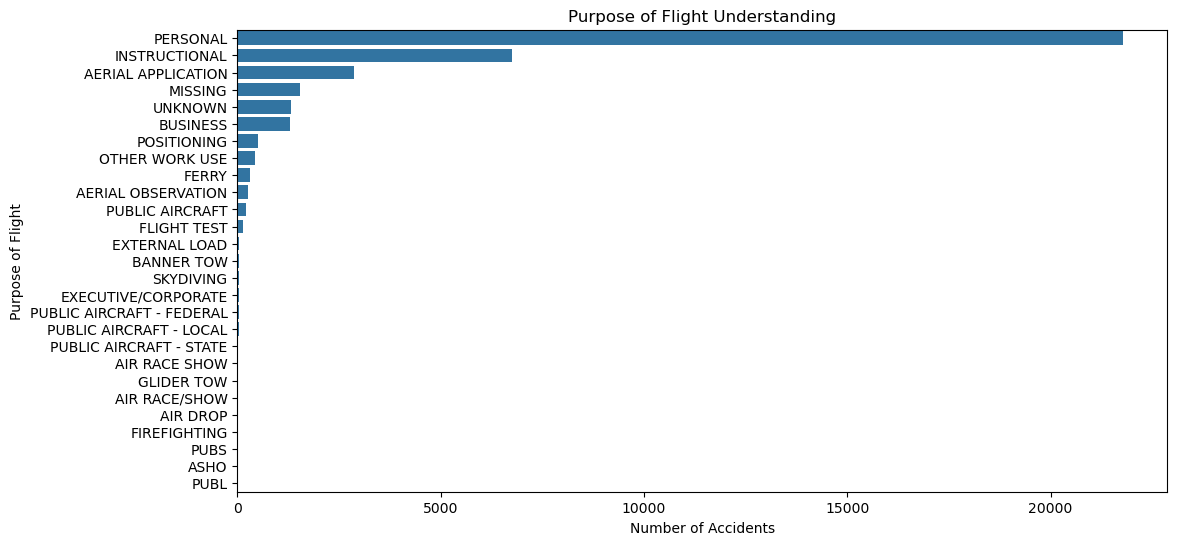

In [104]:
# a visual representation of the data above 

plt.figure(figsize = (12,6))
sns.barplot(x = purpose_counts.values, y = purpose_counts.index)
plt.title('Purpose of Flight Understanding')
plt.xlabel('Number of Accidents')
plt.ylabel('Purpose of Flight')
plt.show()

From the results above, it is risky for the company to invest in personal/privatised flights. This is because it has the highest count of accidents compared to all the other purposes. 

# Conclusion and Recommendations 

### Conclusion

In the analysis above, we explored aviation accident data from 1962 to 2023 to identify insights for aircraft purchase and operational safety recommendations. The data was collected from Kaggle and presented by NTSB. From the cleaning and analysis we have been abke to form visuals to help form recommendations for the company.

The dataset was cleaned by:
- Handling missing values strategically (mode or 'Missing')
- Removing or capping outliers using IQR
- Narrowing to top makes and models for focused insights
- Understanding the engine types, weather, and purpose of the flight

Key findings include:
- The frequency of accidents over the years has decreased 
- Certain makes and models have higher accident frequencies but also higher uninjured counts, which uggests relative safety in accidents.
- Weather conditions and flight phases significantly impact safety outcomes.
- The 